In [2]:
import pickle
import os
import textwrap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel
import altair as alt
from altair import datum

from dltools.cov.markup import compute

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
filename = "Data/Cov ang dist and KER at the low int group; target=C1p,I2p,I1p & p=any.pickle"

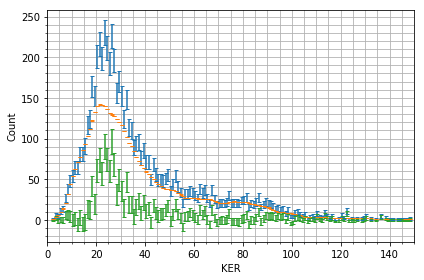

In [3]:
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "ke", "sumke"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.figure()
plt.xlabel("KER")
plt.ylabel("Count")
plt.errorbar(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    d["Sum[XYZ]"][ykey][where] ** 0.5,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.errorbar(
    x[where],
    (d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n)[where],
    ((d["Err[Cov[X,Y,Z]]"][ykey] * n) ** 2 - d["Sum[XYZ]"][ykey])[where] ** 0.5,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.minorticks_on()
plt.grid(True, which="both")
plt.xlim(0, 150)
plt.tight_layout()
plt.show()

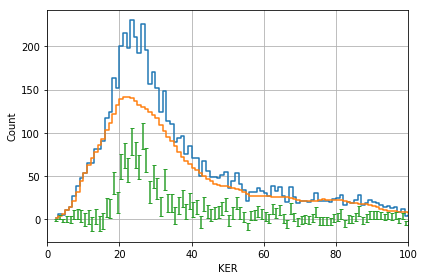

In [4]:
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "ke", "sumke"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.figure()
plt.xlabel("KER")
plt.ylabel("Count")
plt.step(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    where="mid",
)
plt.step(
    x[where],
    (d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n)[where],
    where="mid",
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.grid(True)
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

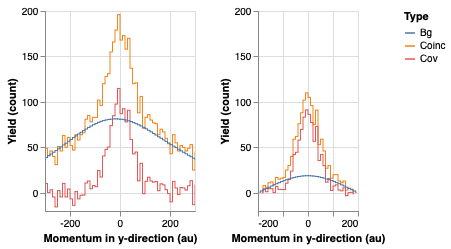

In [194]:
def binit(x):
    return x.groupby_bins("p", range(-500, 500, 10), right=False)


filename = "Data/Cov ang dist and KER at the low int group; target=C1p,I2p,I1p & p=any.pickle"
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "p", "sumpy"
n = d["N"]
dx = d["Sum[XYZ]"][xkey][1] - d["Sum[XYZ]"][xkey][0]
x = binit(d["Sum[XYZ]"][xkey] + dx / 2).mean()
y = binit(d["Sum[XYZ]"][ykey]).sum()
where = 0 < y
df = pd.concat([
    pd.DataFrame({
        "Momentum in y-direction (au)": x[where],
        "Type": "Coinc",
        "Yield (count)": y[where],
        "Std (count)": y[where] ** 0.5,
    }),
    pd.DataFrame({
        "Momentum in y-direction (au)": x[where],
        "Type": "Cov",
        "Yield (count)": binit(d["Cov[X,Y,Z]"][ykey] * n).sum()[where],
        "Std (count)": binit((d["Err[Cov[X,Y,Z]]"][ykey] * n) ** 2).sum()[where] ** 0.5,
    }),
    pd.DataFrame({
        "Momentum in y-direction (au)": x,
        "Type": "Bg",
        "Yield (count)": binit(d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n).sum(),
        "Std (count)": np.nan,
    }),    
], ignore_index=True)

fig0 = alt.Chart(df, width=150, height=200).mark_line(interpolate="step", strokeWidth=1, clip=True).encode(
    alt.X(
        "Momentum in y-direction (au)",
        scale=alt.Scale(domain=[-300, 300], nice=False),
    ),
    alt.Y(
        "Yield (count)",
        scale=alt.Scale(domain=[-20, 200], nice=False),
    ),
    color="Type",
)

filename = "Data/Cov ang dist and KER at the low int group; target=C1p,I2p,I1p.pickle"
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "p", "sumpy"
n = d["N"]
dx = d["Sum[XYZ]"][xkey][1] - d["Sum[XYZ]"][xkey][0]
x = binit(d["Sum[XYZ]"][xkey] + dx / 2).mean()
y = binit(d["Sum[XYZ]"][ykey]).sum()
where = 0 < y
df = pd.concat([
    pd.DataFrame({
        "Momentum in y-direction (au)": x[where],
        "Type": "Coinc",
        "Yield (count)": y[where],
        "Std (count)": y[where] ** 0.5,
    }),
    pd.DataFrame({
        "Momentum in y-direction (au)": x[where],
        "Type": "Cov",
        "Yield (count)": binit(d["Cov[X,Y,Z]"][ykey] * n).sum()[where],
        "Std (count)": binit((d["Err[Cov[X,Y,Z]]"][ykey] * n) ** 2).sum()[where] ** 0.5,
    }),
    pd.DataFrame({
        "Momentum in y-direction (au)": x,
        "Type": "Bg",
        "Yield (count)": binit(d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n).sum(),
        "Std (count)": np.nan,
    }),    
], ignore_index=True)

fig1 = alt.Chart(df, width=100, height=200).mark_line(interpolate="step", strokeWidth=1, clip=True).encode(
    alt.X(
        "Momentum in y-direction (au)",
        scale=alt.Scale(domain=[-200, 200], nice=False),
    ),
    alt.Y(
        "Yield (count)",
        scale=alt.Scale(domain=[-20, 200], nice=False),
    ),
    alt.Color(
        "Type",
    ),
)

fig0 | fig1

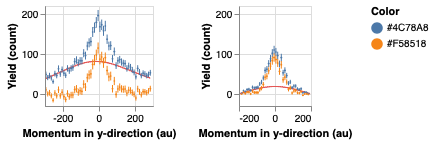

In [42]:
def binit(x):
    return x.groupby_bins("p", range(-300, 300, 10), right=False)


filename = "Data/Cov ang dist and KER at the low int group; target=C1p,I2p,I1p & p=any.pickle"
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "p", "sumpy"
n = d["N"]
dx = d["Sum[XYZ]"][xkey][1] - d["Sum[XYZ]"][xkey][0]
x = binit(d["Sum[XYZ]"][xkey] + dx / 2).mean()
y = binit(d["Sum[XYZ]"][ykey]).sum()
where = 0 < y
df = pd.concat([
    pd.DataFrame({
        "Momentum in y-direction (au)": x[where],
        "Type": "Coinc",
        "Color": "#4C78A8",
        "Yield (count)": y[where],
        "Std (count)": y[where] ** 0.5,
    }),
    pd.DataFrame({
        "Momentum in y-direction (au)": x[where],
        "Type": "Cov",
        "Color": "#F58518",
        "Yield (count)": binit(d["Cov[X,Y,Z]"][ykey] * n).sum()[where],
        "Std (count)": binit((d["Err[Cov[X,Y,Z]]"][ykey] * n) ** 2).sum()[where] ** 0.5,
    }),
    pd.DataFrame({
        "Momentum in y-direction (au)": x,
        "Type": "BG",
        "Color": "#E45756",
        "Yield (count)": binit(d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n).sum(),
        "Std (count)": np.nan,
    }),    
], ignore_index=True)

base = alt.Chart(df, width=108, height=100)
fig0 = base.transform_filter(datum['Type'] == "BG").mark_line(clip=True, interpolate="step", strokeWidth=1).encode(
    alt.X(
        "Momentum in y-direction (au)",
        scale=alt.Scale(domain=[-300, 300], nice=False),
        axis=alt.Axis(values=[-200, 0, 200]),
    ),
    alt.Y(
        "Yield (count)",
        scale=alt.Scale(domain=[-30, 220], nice=False),
    ),
    color=alt.Color(
        "Color",
        scale=None,
    ),
) + base.transform_filter(datum['Type'] != "BG").mark_errorbar(clip=True).encode(
    x="Momentum in y-direction (au)",
    y="Yield (count):Q",
    yError="Std (count):Q",
    color="Color",
) + base.transform_filter(datum['Type'] != "BG").mark_point(clip=True, filled=True, size=4, opacity=1).encode(
    x="Momentum in y-direction (au)",
    y="Yield (count):Q",
    color="Color",
)

filename = "Data/Cov ang dist and KER at the low int group; target=C1p,I2p,I1p.pickle"
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "p", "sumpy"
n = d["N"]
dx = d["Sum[XYZ]"][xkey][1] - d["Sum[XYZ]"][xkey][0]
x = binit(d["Sum[XYZ]"][xkey] + dx / 2).mean()
y = binit(d["Sum[XYZ]"][ykey]).sum()
where = 0 < y
df = pd.concat([
    pd.DataFrame({
        "Momentum in y-direction (au)": x[where],
        "Type": "Coinc",
        "Color": "#4C78A8",
        "Yield (count)": y[where],
        "Std (count)": y[where] ** 0.5,
    }),
    pd.DataFrame({
        "Momentum in y-direction (au)": x[where],
        "Type": "Cov",
        "Color": "#F58518",
        "Yield (count)": binit(d["Cov[X,Y,Z]"][ykey] * n).sum()[where],
        "Std (count)": binit((d["Err[Cov[X,Y,Z]]"][ykey] * n) ** 2).sum()[where] ** 0.5,
    }),
    pd.DataFrame({
        "Momentum in y-direction (au)": x,
        "Type": "BG",
        "Color": "#E45756",
        "Yield (count)": binit(d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n).sum(),
        "Std (count)": np.nan,
    }),    
], ignore_index=True)

base = alt.Chart(df, width=72, height=100)
fig1 = base.transform_filter(datum['Type'] == "BG").mark_line(clip=True, interpolate="step", strokeWidth=1).encode(
    alt.X(
        "Momentum in y-direction (au)",
        scale=alt.Scale(domain=[-200, 200], nice=False),
    ),
    alt.Y(
        "Yield (count)",
        scale=alt.Scale(domain=[-30, 220], nice=False),
        axis=alt.Axis(title=""),
    ),
    color=alt.Color(
        "Color",
        scale=None,
    ),
) + base.transform_filter(datum['Type'] != "BG").mark_errorbar(clip=True).encode(
    x="Momentum in y-direction (au)",
    y="Yield (count):Q",
    yError="Std (count):Q",
    color="Color",
) + base.transform_filter(datum['Type'] != "BG").mark_point(clip=True, filled=True, size=4, opacity=1).encode(
    x="Momentum in y-direction (au)",
    y="Yield (count):Q",
    color="Color",
)
fig0 | fig1

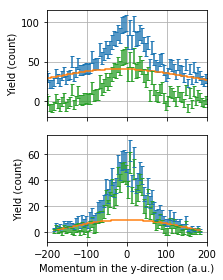

In [22]:
plt.figure(figsize=(3.2, 4))
filename = "Data/Cov ang dist and KER at the low int group; target=C1p,I2p,I1p & p=any.pickle"
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "p", "sumpy"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.subplot(211)
plt.xlabel("Momentum in the y-direction (a.u.)")
plt.ylabel("Yield (count)")
plt.errorbar(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    d["Sum[XYZ]"][ykey][where] ** 0.5,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.step(
    x[where],
    (d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n)[where],
    where="mid",
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.grid(True)
plt.xlim(-200, 200)
plt.gca().label_outer()

filename = "Data/Cov ang dist and KER at the low int group; target=C1p,I2p,I1p.pickle"
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "p", "sumpy"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.subplot(212)
plt.xlabel("Momentum in the y-direction (a.u.)")
plt.ylabel("Yield (count)")
plt.errorbar(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    d["Sum[XYZ]"][ykey][where] ** 0.5,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.step(
    x[where],
    (d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n)[where],
    where="mid",
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.grid(True)
plt.xlim(-200, 200)
plt.tight_layout()
plt.show()

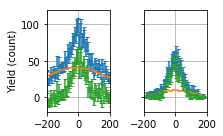

In [28]:
plt.figure(figsize=(3.2, 2))
filename = "Data/Cov ang dist and KER at the low int group; target=C1p,I2p,I1p & p=any.pickle"
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "p", "sumpy"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.subplot(121)
# plt.xlabel("Momentum in the y-direction (a.u.)")
plt.ylabel("Yield (count)")
plt.errorbar(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    d["Sum[XYZ]"][ykey][where] ** 0.5,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.step(
    x[where],
    (d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n)[where],
    where="mid",
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.grid(True)
plt.xlim(-200, 200)
plt.ylim(-20, 120)
plt.gca().label_outer()

filename = "Data/Cov ang dist and KER at the low int group; target=C1p,I2p,I1p.pickle"
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "p", "sumpy"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.subplot(122)
# plt.xlabel("Momentum in the y-direction (a.u.)")
plt.ylabel("Yield (count)")
plt.errorbar(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    d["Sum[XYZ]"][ykey][where] ** 0.5,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.step(
    x[where],
    (d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n)[where],
    where="mid",
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.grid(True)
plt.xlim(-200, 200)
plt.ylim(-20, 120)
plt.gca().label_outer()
plt.tight_layout()
plt.show()

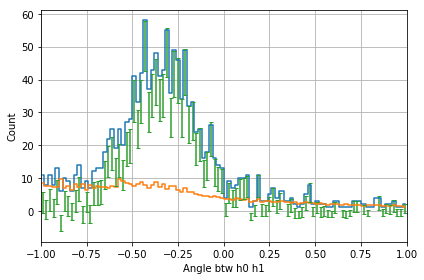

In [22]:
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "cosang", "h0h1angle"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.figure()
plt.xlabel("Angle btw h0 h1")
plt.ylabel("Count")
plt.step(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    where="mid",
)
plt.step(
    x[where],
    (d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n)[where],
    where="mid",
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.grid(True)
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()

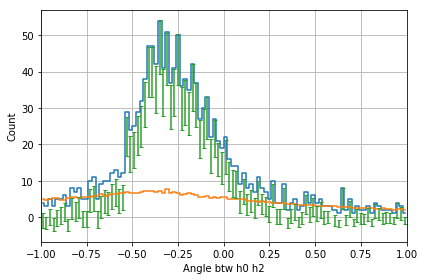

In [21]:
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "cosang", "h0h2angle"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.figure()
plt.xlabel("Angle btw h0 h2")
plt.ylabel("Count")
plt.step(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    where="mid",
)
plt.step(
    x[where],
    (d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n)[where],
    where="mid",
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.grid(True)
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()

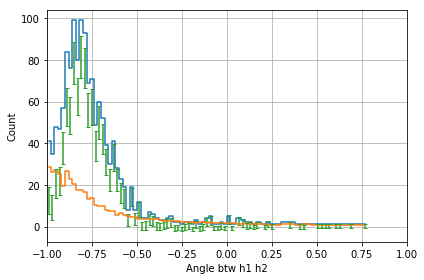

In [20]:
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "cosang", "h1h2angle"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.figure()
plt.xlabel("Angle btw h1 h2")
plt.ylabel("Count")
plt.step(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    where="mid",
)
plt.step(
    x[where],
    (d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n)[where],
    where="mid",
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.grid(True)
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()